# Johnson fig 4.8
## Nodal analysis of a RLC circuit with controlled sources

Solving the equations generated by node analysis for Johnson fig4-8.net [1].

References  
1. Basic Electric Circuit Analysis, D. E. Johnson, J. L. Hilburn, and J. R. Johnson, Prentice-Hall, 1978

In [1]:
from sympy import *
import numpy as np
init_printing()

Get the symbols and equations generated in nodal analysis code.

In [2]:
V1, R2, v4, R4, I1, v3, v5, I_V2, R3, I_V1, h1, R1, V2, v1, g1, v2, I_H1 = symbols('V1 R2 v4 R4 I1 v3 v5 I_V2 R3 I_V1 h1 R1 V2 v1 g1 v2 I_H1')

equ =  Matrix(
    [[Eq(I_V1 + v1*(1/R2 + 1/R1) - v2/R2 - v4/R1, 0)],
    [Eq(I_H1 + v2*(1/R4 + 1/R2) - v5/R4 - v1/R2, 0)],
    [Eq(-I_H1 - g1*v1 + v4*(g1 - 1/R3) + v3/R3, 0)],
    [Eq(v4*(1/R3 + 1/R1) - v3/R3 - v1/R1, -I1)],
    [Eq(-I_V2 - v2/R4 + v5/R4, 0)],
    [Eq(v1, V1)],
    [Eq(-I_V2*h1 + v2 - v3, V2)],
    [Eq(-v5, 0)]])
equ

⎡            ⎛1    1 ⎞   v₂   v₄      ⎤
⎢  I_V1 + v₁⋅⎜── + ──⎟ - ── - ── = 0  ⎥
⎢            ⎝R₂   R₁⎠   R₂   R₁      ⎥
⎢                                     ⎥
⎢            ⎛1    1 ⎞   v₅   v₁      ⎥
⎢  I_H1 + v₂⋅⎜── + ──⎟ - ── - ── = 0  ⎥
⎢            ⎝R₄   R₂⎠   R₄   R₂      ⎥
⎢                                     ⎥
⎢                   ⎛     1 ⎞   v₃    ⎥
⎢-I_H1 - g₁⋅v₁ + v₄⋅⎜g₁ - ──⎟ + ── = 0⎥
⎢                   ⎝     R₃⎠   R₃    ⎥
⎢                                     ⎥
⎢       ⎛1    1 ⎞   v₃   v₁           ⎥
⎢    v₄⋅⎜── + ──⎟ - ── - ── = -I₁     ⎥
⎢       ⎝R₃   R₁⎠   R₃   R₁           ⎥
⎢                                     ⎥
⎢                 v₂   v₅             ⎥
⎢         -I_V2 - ── + ── = 0         ⎥
⎢                 R₄   R₄             ⎥
⎢                                     ⎥
⎢               v₁ = V₁               ⎥
⎢                                     ⎥
⎢       -I_V2⋅h₁ + v₂ - v₃ = V₂       ⎥
⎢                                     ⎥
⎣               -v₅ = 0               ⎦

In [3]:
# enter the element values
equ1a = equ.subs({R1:2})
equ1a = equ1a.subs({R2:1})
equ1a = equ1a.subs({R3:1})
equ1a = equ1a.subs({R4:2})

equ1a = equ1a.subs({V1:2})
equ1a = equ1a.subs({V2:0})
equ1a = equ1a.subs({I1:9})
equ1a = equ1a.subs({h1:3})
equ1a = equ1a.subs({g1:2})

equ1a  # display the equations

⎡       3⋅v₁        v₄     ⎤
⎢I_V1 + ──── - v₂ - ── = 0 ⎥
⎢        2          2      ⎥
⎢                          ⎥
⎢            3⋅v₂   v₅     ⎥
⎢I_H1 - v₁ + ──── - ── = 0 ⎥
⎢             2     2      ⎥
⎢                          ⎥
⎢-I_H1 - 2⋅v₁ + v₃ + v₄ = 0⎥
⎢                          ⎥
⎢    v₁        3⋅v₄        ⎥
⎢  - ── - v₃ + ──── = -9   ⎥
⎢    2          2          ⎥
⎢                          ⎥
⎢           v₂   v₅        ⎥
⎢   -I_V2 - ── + ── = 0    ⎥
⎢           2    2         ⎥
⎢                          ⎥
⎢          v₁ = 2          ⎥
⎢                          ⎥
⎢  -3⋅I_V2 + v₂ - v₃ = 0   ⎥
⎢                          ⎥
⎣         -v₅ = 0          ⎦

In [4]:
solve(equ1a,[v1, v2, v3, v4, v5, I_V1, I_H1, I_V2])

## AC small signal analysis
Replace R2 and R3 with C1 and L1. AC small signal analysis, set AC source amplitude to 1 and phase to 0, since this is the value for the analysis. Independent current source, since it is a DC source, set it to 0 for AC analysis. 

use: Johnson fig4-8a.net
```
R1 1 4 2
*R2 1 2 1
C1 1 2 1
*R3 4 3 1
L1 4 3 1
R4 2 5 2
V1 1 0 2
I1 4 0 9
H1 2 3 V2 3
G1 0 3 1 4 2
V2 0 5 0
```
Get the symbols and equations generated in nodal analysis code.

In [5]:
V1, v4, R4, I1, v3, v5, I_V2, I_V1, h1, I_L1, s, C1, R1, V2, v1, g1, L1, v2, I_H1 = symbols('V1 v4 R4 I1 v3 v5 I_V2 I_V1 h1 I_L1 s C1 R1 V2 v1 g1 L1 v2 I_H1')

equ =  Matrix(
    [[Eq(-C1*s*v2 + I_V1 + v1*(C1*s + 1/R1) - v4/R1, 0)],
    [Eq(-C1*s*v1 + I_H1 + v2*(C1*s + 1/R4) - v5/R4, 0)],
    [Eq(-I_H1 - I_L1 - g1*v1 + g1*v4, 0)],
    [Eq(I_L1 - v1/R1 + v4/R1, -I1)],
    [Eq(-I_V2 - v2/R4 + v5/R4, 0)],
    [Eq(v1, V1)],
    [Eq(-v5, V2)],
    [Eq(-I_V2*h1 + v2 - v3, 0)],
    [Eq(-I_L1*L1*s - v3 + v4, 0)]])
equ

⎡                     ⎛       1 ⎞   v₄    ⎤
⎢-C₁⋅s⋅v₂ + I_V1 + v₁⋅⎜C₁⋅s + ──⎟ - ── = 0⎥
⎢                     ⎝       R₁⎠   R₁    ⎥
⎢                                         ⎥
⎢                     ⎛       1 ⎞   v₅    ⎥
⎢-C₁⋅s⋅v₁ + I_H1 + v₂⋅⎜C₁⋅s + ──⎟ - ── = 0⎥
⎢                     ⎝       R₄⎠   R₄    ⎥
⎢                                         ⎥
⎢    -I_H1 - I_L1 - g₁⋅v₁ + g₁⋅v₄ = 0     ⎥
⎢                                         ⎥
⎢                 v₁   v₄                 ⎥
⎢          I_L1 - ── + ── = -I₁           ⎥
⎢                 R₁   R₁                 ⎥
⎢                                         ⎥
⎢                   v₂   v₅               ⎥
⎢           -I_V2 - ── + ── = 0           ⎥
⎢                   R₄   R₄               ⎥
⎢                                         ⎥
⎢                 v₁ = V₁                 ⎥
⎢                                         ⎥
⎢                -v₅ = V₂                 ⎥
⎢                                         ⎥
⎢         -I_V2⋅h₁ + v₂ - v₃ = 0

In [6]:
# enter the element values
equ1a = equ.subs({R1:2})
equ1a = equ1a.subs({C1:1})
equ1a = equ1a.subs({L1:1})
equ1a = equ1a.subs({R4:2})

equ1a = equ1a.subs({V1:1}) # set this to 1, since it is the AC value of the source for analysis
equ1a = equ1a.subs({V2:0})
equ1a = equ1a.subs({I1:0}) # set this to 0, since DC current is not considered for AC signal analysis
equ1a = equ1a.subs({h1:3})
equ1a = equ1a.subs({g1:2})

equ1a  # display the equations

⎡                             v₄    ⎤
⎢I_V1 - s⋅v₂ + v₁⋅(s + 1/2) - ── = 0⎥
⎢                             2     ⎥
⎢                                   ⎥
⎢                             v₅    ⎥
⎢I_H1 - s⋅v₁ + v₂⋅(s + 1/2) - ── = 0⎥
⎢                             2     ⎥
⎢                                   ⎥
⎢  -I_H1 - I_L1 - 2⋅v₁ + 2⋅v₄ = 0   ⎥
⎢                                   ⎥
⎢               v₁   v₄             ⎥
⎢        I_L1 - ── + ── = 0         ⎥
⎢               2    2              ⎥
⎢                                   ⎥
⎢                v₂   v₅            ⎥
⎢        -I_V2 - ── + ── = 0        ⎥
⎢                2    2             ⎥
⎢                                   ⎥
⎢              v₁ = 1               ⎥
⎢                                   ⎥
⎢              -v₅ = 0              ⎥
⎢                                   ⎥
⎢       -3⋅I_V2 + v₂ - v₃ = 0       ⎥
⎢                                   ⎥
⎣       -I_L1⋅s - v₃ + v₄ = 0       ⎦

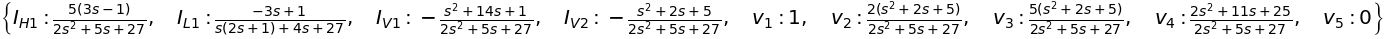

In [7]:
solve(equ1a,[v1, v2, v3, v4, v5, I_L1, I_V1, I_H1, I_V2])

Solve for omega equal to 1 radian per second, s = 1j.

In [8]:
equ1a = equ1a.subs({s:1j})
equ1a  # display the equations

⎡                                     v₄    ⎤
⎢I_V1 + v₁⋅(1/2 + 1.0⋅ⅈ) - 1.0⋅ⅈ⋅v₂ - ── = 0⎥
⎢                                     2     ⎥
⎢                                           ⎥
⎢                                     v₅    ⎥
⎢I_H1 - 1.0⋅ⅈ⋅v₁ + v₂⋅(1/2 + 1.0⋅ⅈ) - ── = 0⎥
⎢                                     2     ⎥
⎢                                           ⎥
⎢      -I_H1 - I_L1 - 2⋅v₁ + 2⋅v₄ = 0       ⎥
⎢                                           ⎥
⎢                   v₁   v₄                 ⎥
⎢            I_L1 - ── + ── = 0             ⎥
⎢                   2    2                  ⎥
⎢                                           ⎥
⎢                    v₂   v₅                ⎥
⎢            -I_V2 - ── + ── = 0            ⎥
⎢                    2    2                 ⎥
⎢                                           ⎥
⎢                  v₁ = 1                   ⎥
⎢                                           ⎥
⎢                  -v₅ = 0                  ⎥
⎢                                 

In [9]:
ans = solve(equ1a,[v1, v2, v3, v4, v5, I_L1, I_V1, I_H1, I_V2])
ans

In [10]:
print('v1 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v1])),float(arg(ans[v1])*180/np.pi)))
print('v2 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v2])),float(arg(ans[v2])*180/np.pi)))
print('v3 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v3])),float(arg(ans[v3])*180/np.pi)))
print('v4 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v4])),float(arg(ans[v4])*180/np.pi)))
print('v5 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[v5])),float(arg(ans[v5])*180/np.pi)))

print('I_H1 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_H1])),float(arg(ans[I_H1])*180/np.pi)))
print('I_L1 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_L1])),float(arg(ans[I_L1])*180/np.pi)))
print('I_V1 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_V1])),float(arg(ans[I_V1])*180/np.pi)))
print('I_V2 mag: {:.4f} phase: {:.4f} deg'.format(float(abs(ans[I_V2])),float(arg(ans[I_V2])*180/np.pi)))

v1 mag: 1.0000 phase: 0.0000 deg
v2 mag: 0.3508 phase: 15.2551 deg
v3 mag: 0.8771 phase: 15.2551 deg
v4 mag: 1.0000 phase: 14.2500 deg
v5 mag: 0.0000 phase: nan deg
I_H1 mag: 0.6202 phase: 97.1250 deg
I_L1 mag: 0.1240 phase: -82.8750 deg
I_V1 mag: 0.5491 phase: -101.3099 deg
I_V2 mag: 0.1754 phase: -164.7449 deg


The solution agrees with LTspice.